In [16]:
from datasets import dataset_dict

dataset = dataset_dict['replicagt']\
          ('/media/dlr/nd/Replica/office0', 'train', img_downscale=8, use_cache=True)
# import ipykernel
# ipykernel.__version__

In [17]:
spcd = dataset.xyz_world[:, 0:3]

In [18]:
# 输出 xyz 的区域
print('x y z min:\n', spcd.min(axis=0))
print('x y z max:\n', spcd.max(axis=0))

# x y z min:  sparse/1
#  [-6.54953551 -5.36338179 -4.00462022]
# x y z max:
#  [6.67050045 3.93044254 2.00564728]
# replica gt
# x y z min:
#  [-2.31363554 -3.6267746  -1.32526958]
# x y z max:
#  [2.76118182 2.07290486 2.04233558]

x y z min:
 [-2.31363554 -3.6267746  -1.32526958]
x y z max:
 [2.76118182 2.07290486 2.04233558]


In [19]:
rays_o, rays_d = dataset.all_rays[:10880, :3], dataset.all_rays[:10880, 3:6] # 10880 816000 (10880,3)
near, far = dataset.all_rays[:10880, 6:7], dataset.all_rays[:10880, 7:8] # (10880,1)

start = (rays_o + near * rays_d).numpy() # (10880,3)
end = (rays_o + far * rays_d).numpy() # (10880,3)
pass

### Blue points: scene geometry
### Red points: all cameras
### Purple point: an example camera
### Green frustum: the viewing frustum of the purple camera. It should cover the scene geometry. 

## You can move around using nbviewer!

In [20]:
import plotly.graph_objects as go

fig = go.Figure()

z_in_range = dataset.xyz_world[:, 2]<5
skip = 2

fig.add_trace(
    go.Scatter3d(
        x=dataset.xyz_world[z_in_range, 0][::skip],
        y=dataset.xyz_world[z_in_range, 1][::skip],
        z=dataset.xyz_world[z_in_range, 2][::skip],
        mode='markers',
        name='scene',
        marker=dict(size=0.3)
    )
)

fig.add_trace(
    go.Scatter3d(
        x=dataset.poses[:, 0, 3],
        y=dataset.poses[:, 1, 3],
        z=dataset.poses[:, 2, 3],
        mode='markers',
        name='cameras',
        marker=dict(size=1)
    )
)

xlines = []
ylines = []
zlines = []
for i in [0, 127, -128, -1]:
    xlines += [start[i, 0], end[i, 0], None]
    ylines += [start[i, 1], end[i, 1], None]
    zlines += [start[i, 2], end[i, 2], None]
    
for p in [[0, 127], [127, -1], [-128, -1], [-128, 0]]:
    xlines += [start[p[0], 0], start[p[1], 0], None]
    ylines += [start[p[0], 1], start[p[1], 1], None]
    zlines += [start[p[0], 2], start[p[1], 2], None]
    xlines += [end[p[0], 0], end[p[1], 0], None]
    ylines += [end[p[0], 1], end[p[1], 1], None]
    zlines += [end[p[0], 2], end[p[1], 2], None]

fig.add_trace(
    go.Scatter3d(
        x=xlines,
        y=ylines,
        z=zlines,
        mode='lines',
        name='frustum',
        marker=dict(size=1)
    )
)

pose = dataset.poses_dict[dataset.img_ids_train[0]]


fig.add_trace(
    go.Scatter3d(
        x=[pose[0, 3]],
        y=[pose[1, 3]],
        z=[pose[2, 3]],
        mode='markers',
        name='camera',
        marker=dict(size=4)
    )
)

fig.show()

### The image taken from the purple camera

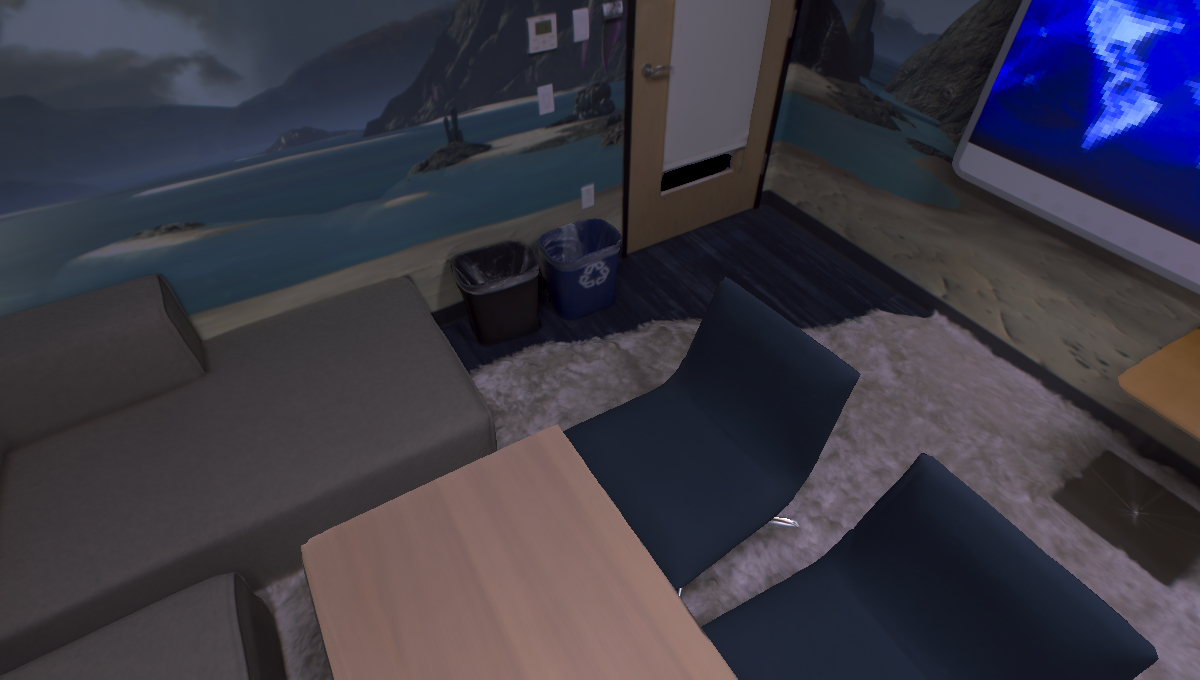

In [8]:
from PIL import Image
import os

Image.open(os.path.join('/media/dlr/nd/Replica/office0/images',
                        dataset.image_paths[dataset.img_ids_train[0]])).convert('RGB')